In [125]:
import warnings
warnings.filterwarnings('ignore')
import os


# In this project we are analysing a dataset where user response is captured and analysing those comments (text analysis)
we will get to to know if the user is happy with the hotel service or not happy.

In [126]:
import pandas as pd
reviewedDf=pd.read_csv('train.csv')

In [127]:
reviewedDf

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


Exploratory Data Analysis

In [128]:
reviewedDf.shape

(38932, 5)

In [129]:
reviewedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


Is_Response column will be our target variable , analysing which we will get to the know the response. And whether a review is a positive or negative.


In [130]:
reviewedDf.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id48748,1
Description,38932,38932,We chose this hotel-motel in part because of t...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


# DATA CLEANING

In [131]:

reviewedDf.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [132]:
count=reviewedDf.isnull().sum().sort_values(ascending=False)

In [133]:
percentage= (reviewedDf.isnull().sum()/len(reviewedDf)*100).sort_values(ascending=False)

In [134]:
missing_data=pd.concat([count,percentage],axis=1,
                       keys=['Count','Percentage'])

In [135]:
missing_data

,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


In [136]:
import matplotlib.pyplot as plt

In [137]:
reviewedDf['Is_Response'].value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

Text(0.5, 1.0, 'Percentage Distribution by review type')

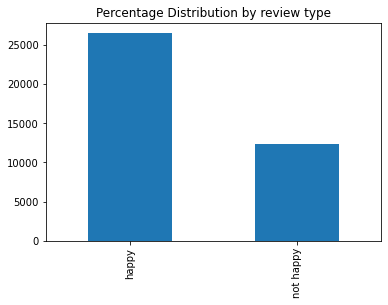

In [138]:
reviewedDf['Is_Response'].value_counts().plot(kind='bar')
plt.title('Percentage Distribution by review type')

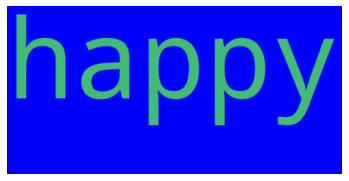

In [250]:
#create a word cloud on the user_response.

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = reviewedDf.Is_Response[0]

wordcloud = WordCloud(max_words=100,background_color="blue").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [139]:
reviewedDf.drop(columns=['User_ID','Browser_Used','Device_Used'],inplace=True)

In [140]:
import re
import string

In [141]:
#cleaning of data, unwanted texts


In [142]:
def text_clean(text):
    text=text.lower()
    text= re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [143]:
cleaned_1=lambda x:text_clean(x)

In [144]:
#creating a new col with cleaned desc
reviewedDf['cleaned_description']= pd.DataFrame(reviewedDf.Description.apply(cleaned_1))

In [145]:
reviewedDf.head()

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [146]:
# next level of cleaning
def clean_text_1(text):
    text=re.sub('""',' ',text)
    text=re.sub("''",'',text)
    text=re.sub('\n','',text)
    return text
cleaned_2=lambda x:clean_text_1(x)

In [147]:
##creating a new col with more cleaned desc
reviewedDf['cleaned_description_new']= pd.DataFrame(reviewedDf.cleaned_description.apply(cleaned_2))

In [148]:
reviewedDf.head()

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...


In [149]:
reviewedDf['Description']

0        The room was kind of clean but had a VERY stro...
1        I stayed at the Crown Plaza April -- - April -...
2        I booked this hotel through Hotwire at the low...
3        Stayed here with husband and sons on the way t...
4        My girlfriends and I stayed here to celebrate ...
                               ...                        
38927    We arrived late at night and walked in to a ch...
38928    The only positive impression is location and p...
38929    Traveling with friends for shopping and a show...
38930    The experience was just ok. We paid extra for ...
38931    The Westin is a wonderfully restored grande da...
Name: Description, Length: 38932, dtype: object

In [150]:
reviewedDf.columns

Index(['Description', 'Is_Response', 'cleaned_description',
       'cleaned_description_new'],
      dtype='object')


Next level of cleaning will have stopwords removal

Data Pre-processing

We will perform the following steps:
Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
Words that have fewer than 3 characters are removed.
All stopwords are removed.

Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.

Words are stemmed — words are reduced to their root form.

In [151]:
reviewedDf['cleaned_description_new'] = reviewedDf['cleaned_description_new'].str.lower()
reviewedDf['cleaned_description_new']

0        the room was kind of clean but had a very stro...
1        i stayed at the crown plaza april   april   th...
2        i booked this hotel through hotwire at the low...
3        stayed here with husband and sons on the way t...
4        my girlfriends and i stayed here to celebrate ...
                               ...                        
38927    we arrived late at night and walked in to a ch...
38928    the only positive impression is location and p...
38929    traveling with friends for shopping and a show...
38930    the experience was just ok we paid extra for a...
38931    the westin is a wonderfully restored grande da...
Name: cleaned_description_new, Length: 38932, dtype: object

In [154]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankumari\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [155]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviewedDf['Description_without_stopwords'] = reviewedDf['cleaned_description_new'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Now we have the column descripton where stopwords are not there and has the comparatively clean data

In [157]:
reviewedDf['Description_without_stopwords']

0        room kind clean strong smell dogs generally av...
1        stayed crown plaza april april staff friendly ...
2        booked hotel hotwire lowest price could find g...
3        stayed husband sons way alaska cruise loved ho...
4        girlfriends stayed celebrate th birthdays plan...
                               ...                        
38927    arrived late night walked checkin area complet...
38928    positive impression location public parking op...
38929    traveling friends shopping show location great...
38930    experience ok paid extra view pool got view pa...
38931    westin wonderfully restored grande dame hotel ...
Name: Description_without_stopwords, Length: 38932, dtype: object

In [196]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ankumari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

A function which will help in lemmetization and stemming of the variable

In [208]:
stemmer = PorterStemmer()
'''
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
'''
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [209]:
reviewedDf.head()

,Description,Is_Response,cleaned_description,cleaned_description_new,Description_without_stopwords
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...,room kind clean strong smell dogs generally av...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...,stayed crown plaza april april staff friendly ...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...,booked hotel hotwire lowest price could find g...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...,stayed husband sons way alaska cruise loved ho...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...,girlfriends stayed celebrate th birthdays plan...


In [210]:
doc=reviewedDf[:5]
doc

,Description,Is_Response,cleaned_description,cleaned_description_new,Description_without_stopwords
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...,room kind clean strong smell dogs generally av...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...,stayed crown plaza april april staff friendly ...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...,booked hotel hotwire lowest price could find g...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...,stayed husband sons way alaska cruise loved ho...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...,girlfriends stayed celebrate th birthdays plan...


In [211]:
doc_sample = reviewedDf.iloc[0,4]
doc_sample

'room kind clean strong smell dogs generally average ok overnight stay youre fussy would consider staying price right breakfast free better nothing'

In [212]:
#doc_sample = reviewedDf.iloc[[0],[4]] [0][0]
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

['room', 'kind', 'clean', 'strong', 'smell', 'dogs', 'generally', 'average', 'ok', 'overnight', 'stay', 'youre', 'fussy', 'would', 'consider', 'staying', 'price', 'right', 'breakfast', 'free', 'better', 'nothing']


 tokenized and lemmatized document: 
['room', 'kind', 'clean', 'strong', 'smell', 'dog', 'generally', 'average', 'overnight', 'stay', 'youre', 'fussy', 'consider', 'stay', 'price', 'right', 'breakfast', 'free', 'better']


Here we can see words are lemmetized where words are being converted into its root word. Stemming can also be done where words are converted
int its nearest word which may not have any meaning and is least recommended when compared to lemmetization

In [213]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(reviewedDf['Description_without_stopwords'])

In [214]:
print(X)

  (0, 52348)	0.1885690030263641
  (0, 8158)	0.16509787128609335
  (0, 30729)	0.14168058278669082
  (0, 9793)	0.11813324429547957
  (0, 64954)	0.14904102693937077
  (0, 59640)	0.153471065132082
  (0, 73726)	0.16540686780180902
  (0, 17004)	0.25923463188516516
  (0, 87440)	0.1000667986971306
  (0, 31745)	0.37566808724422307
  (0, 88202)	0.2159920871636967
  (0, 73630)	0.0888516833804773
  (0, 55082)	0.2669121096603803
  (0, 53410)	0.2015913184123856
  (0, 5370)	0.22406832289759715
  (0, 32185)	0.2742455622216843
  (0, 22542)	0.323201351777566
  (0, 70927)	0.24300984867530925
  (0, 74664)	0.3066666549006464
  (0, 14528)	0.10525063648343551
  (0, 42136)	0.21444192870275222
  (0, 65482)	0.07225732753350379
  (1, 83137)	0.0920469105944917
  (1, 15648)	0.07028910268053193
  (1, 10914)	0.06203818019602065
  :	:
  (38930, 83799)	0.15956281378038678
  (38930, 55803)	0.07889461097942706
  (38930, 65742)	0.05167739691322474
  (38930, 71052)	0.14429427502703623
  (38930, 33147)	0.07590894716503037


In [215]:
processed_docs = reviewedDf['Description_without_stopwords'].map(preprocess)
processed_docs[:10]

0    [room, kind, clean, strong, smell, dog, genera...
1    [stay, crown, plaza, april, april, staff, frie...
2    [book, hotel, hotwire, lowest, price, desk, ma...
3    [stay, husband, sons, alaska, cruise, love, ho...
4    [girlfriends, stay, celebrate, birthdays, plan...
5    [room, nice, clearly, update, recently, clean,...
6    [husband, stay, hotel, time, fanciest, hotel, ...
7    [wife, stay, glorious, city, expensive, little...
8    [boyfriend, stay, fairmont, recent, trip, fran...
9    [wonderful, staff, great, location, definately...
Name: Description_without_stopwords, dtype: object

Bag of Words

this will create a dictionary of words and number of occurance it has in the dataset

In [218]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 average
1 better
2 breakfast
3 clean
4 consider
5 dog
6 free
7 fussy
8 generally
9 kind
10 overnight


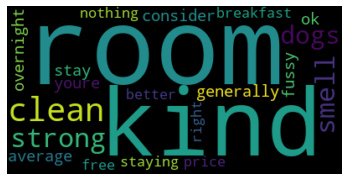

In [221]:
# Create and generate a word cloud image:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = reviewedDf.Description_without_stopwords[0]
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [225]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [228]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 2 ("breakfast") appears 1 time.
Word 6 ("free") appears 2 time.
Word 13 ("room") appears 3 time.
Word 68 ("space") appears 1 time.
Word 81 ("available") appears 1 time.
Word 104 ("hotel") appears 1 time.
Word 108 ("location") appears 1 time.
Word 119 ("park") appears 1 time.
Word 130 ("view") appears 2 time.
Word 143 ("needle") appears 2 time.
Word 152 ("walk") appears 1 time.
Word 177 ("fine") appears 1 time.
Word 190 ("night") appears 1 time.
Word 222 ("wonderful") appears 1 time.
Word 234 ("morning") appears 1 time.
Word 263 ("time") appears 1 time.
Word 363 ("airport") appears 1 time.
Word 366 ("arrive") appears 1 time.
Word 486 ("unfortunately") appears 1 time.
Word 503 ("neighborhood") appears 1 time.
Word 573 ("think") appears 1 time.
Word 790 ("dark") appears 1 time.
Word 885 ("felt") appears 1 time.
Word 913 ("choose") appears 1 time.
Word 949 ("sound") appears 1 time.
Word 1309 ("keep") appears 1 time.
Word 1445 ("sirens") appears 1 time.
Word 1992 ("awake") appears 1 ti

TF-IDF

tfidf provides the score of each word based on thir occurence.More the score , more the occurence.

In [229]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.23770448413859524),
 (1, 0.15712921585571077),
 (2, 0.0907847664753764),
 (3, 0.06962900728058088),
 (4, 0.22905448501767361),
 (5, 0.37518086926106214),
 (6, 0.12492601934626668),
 (7, 0.4480885107982859),
 (8, 0.30756098142883653),
 (9, 0.22514427675711277),
 (10, 0.2974474139904018),
 (11, 0.1236847443629668),
 (12, 0.1349056856272137),
 (13, 0.014750987774714128),
 (14, 0.2236831204166206),
 (15, 0.053009155383581114),
 (16, 0.35231620736474484),
 (17, 0.22727937083810063)]


Running LDA using Bag of Words

Train our lda model using gensim.models.LdaMulticore

In [231]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    

Topic: 0 
Words: 0.046*"room" + 0.031*"hotel" + 0.019*"stay" + 0.008*"time" + 0.008*"staff" + 0.007*"check" + 0.007*"service" + 0.007*"night" + 0.007*"desk" + 0.006*"book"
Topic: 1 
Words: 0.025*"hotel" + 0.022*"room" + 0.016*"stay" + 0.011*"service" + 0.010*"staff" + 0.008*"desk" + 0.008*"park" + 0.007*"time" + 0.007*"pool" + 0.007*"nice"
Topic: 2 
Words: 0.017*"room" + 0.010*"great" + 0.007*"floor" + 0.007*"sofitel" + 0.006*"hotel" + 0.006*"good" + 0.005*"location" + 0.005*"nice" + 0.005*"stay" + 0.004*"service"
Topic: 3 
Words: 0.014*"memphis" + 0.009*"stay" + 0.008*"beale" + 0.007*"graceland" + 0.007*"elvis" + 0.006*"room" + 0.006*"staff" + 0.004*"hotel" + 0.004*"peabody" + 0.004*"great"
Topic: 4 
Words: 0.026*"breakfast" + 0.021*"room" + 0.013*"egg" + 0.013*"hotel" + 0.012*"fruit" + 0.011*"coffee" + 0.010*"waffle" + 0.008*"order" + 0.008*"stay" + 0.008*"cereal"
Topic: 5 
Words: 0.036*"room" + 0.022*"hotel" + 0.013*"stay" + 0.011*"night" + 0.010*"nice" + 0.009*"place" + 0.009*"bath

In [253]:
#Running LDA using TF-IDF

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.001*"great" + 0.001*"nice" + 0.001*"good" + 0.001*"location" + 0.001*"staff" + 0.001*"clean" + 0.001*"friendly" + 0.001*"time" + 0.001*"hotel" + 0.001*"stay"
Topic: 1 Word: 0.001*"great" + 0.001*"good" + 0.001*"service" + 0.001*"nice" + 0.001*"location" + 0.001*"clean" + 0.001*"place" + 0.001*"hotel" + 0.001*"stay" + 0.001*"breakfast"
Topic: 2 Word: 0.005*"great" + 0.003*"location" + 0.003*"staff" + 0.003*"friendly" + 0.003*"nice" + 0.003*"clean" + 0.003*"good" + 0.003*"helpful" + 0.003*"walk" + 0.002*"hotel"
Topic: 3 Word: 0.001*"great" + 0.001*"staff" + 0.001*"nice" + 0.001*"helpful" + 0.001*"friendly" + 0.001*"clean" + 0.001*"good" + 0.001*"location" + 0.001*"stay" + 0.001*"hotel"
Topic: 4 Word: 0.003*"great" + 0.002*"service" + 0.002*"staff" + 0.002*"nice" + 0.002*"stay" + 0.002*"hotel" + 0.002*"time" + 0.002*"breakfast" + 0.002*"friendly" + 0.002*"good"
Topic: 5 Word: 0.002*"great" + 0.001*"nice" + 0.001*"good" + 0.001*"staff" + 0.001*"clean" + 0.001*"location" + 